# Noise2Void - 2D Example for RGB Data

In [1]:
# We import all our dependencies.
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread, imsave
from csbdeep.io import save_tiff_imagej_compatible

Using TensorFlow backend.


## Load the Network

In [2]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.  
model_name = 'n2v_2D'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [3]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

## Prediction
Here we will simply use the same image as during training and denoise it using our network.

In [4]:
# We read the image we want to process and get rid of the Alpha channel.
img = imread('data/longBeach.png')[...,:3]

# Here we process the image.
pred = model.predict(img, axes='YXC')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


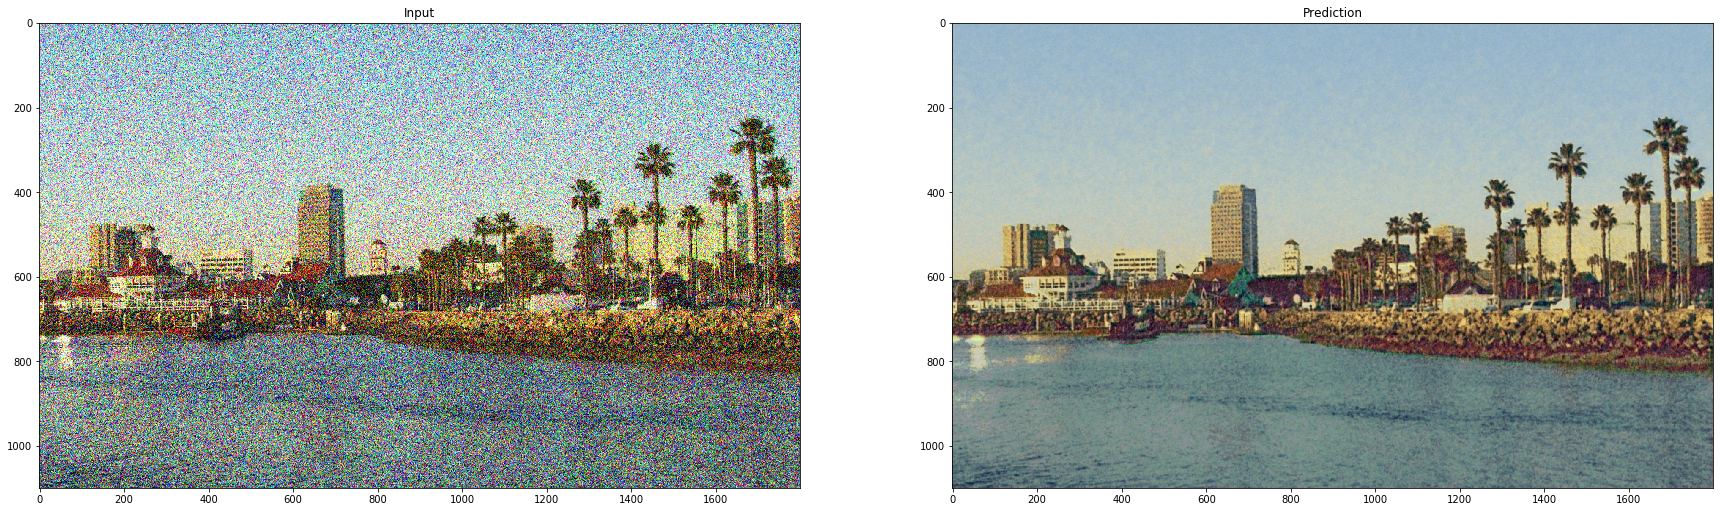

In [5]:
# Let's look at the results.
plt.figure(figsize=(30,30))

# We show the noisy input...
plt.subplot(1,2,1)
plt.imshow( img[:,1000:3000,...] )
plt.title('Input');

# and the result.
plt.subplot(1,2,2)
plt.imshow( pred[:,1000:3000,...] )
plt.title('Prediction');


## Save Results

In [6]:
from matplotlib.image import imsave
imsave('pred_longBeach.png', np.clip(pred,0.0,1.0))